In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import collections
import matplotlib
%matplotlib inline

## Explore Data

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

node_start                node_end        status
0          Hong Kong                   Samoa  jurisdiction
1          Hong Kong                   Samoa  jurisdiction
2          Hong Kong                   Samoa  jurisdiction
3          Hong Kong                   Samoa  jurisdiction
4          Hong Kong                   Samoa  jurisdiction
...              ...                     ...           ...
338127     Indonesia  British Virgin Islands  officer_base
338128  Cook Islands  British Virgin Islands  officer_base
338129     Hong Kong  British Virgin Islands  officer_base
338130  Cook Islands          United Kingdom  officer_base
338131     Hong Kong          United Kingdom  officer_base

[338132 rows x 3 columns]

In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

node_start                node_end        status  weight
0          Hong Kong                   Samoa  jurisdiction     2.0
1          Hong Kong                   Samoa  jurisdiction     2.0
2          Hong Kong                   Samoa  jurisdiction     2.0
3          Hong Kong                   Samoa  jurisdiction     2.0
4          Hong Kong                   Samoa  jurisdiction     2.0
...              ...                     ...           ...     ...
338119     Indonesia  British Virgin Islands  officer_base     1.0
338120  Cook Islands  British Virgin Islands  officer_base     1.0
338121     Hong Kong  British Virgin Islands  officer_base     1.0
338122  Cook Islands          United Kingdom  officer_base     1.0
338123     Hong Kong          United Kingdom  officer_base     1.0

[338124 rows x 4 columns]

In [4]:
df_weighted['status'].unique()

array(['jurisdiction', 'intermediary_base', 'intermediary_jurisdiction',
       'officer_base', 'officer_jurisdiction'], dtype=object)

In [5]:
jurisdiction_list = ['jurisdiction', 'officer_jurisdiction','intermediary jurisdiction']

In [6]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_list)]
df_jur = df_weighted_jur.drop(['status'], axis = 1)
df_jur

node_start                node_end  weight
0                    Hong Kong                   Samoa     2.0
1                    Hong Kong                   Samoa     2.0
2                    Hong Kong                   Samoa     2.0
3                    Hong Kong                   Samoa     2.0
4                    Hong Kong                   Samoa     2.0
...                        ...                     ...     ...
221136               Indonesia                   Samoa     0.5
221137          Cayman Islands                   Samoa     0.5
221138  British Virgin Islands                   Samoa     0.5
221139                   China                   Samoa     0.5
221140                   China  British Virgin Islands     0.5

[216674 rows x 3 columns]

In [7]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).sum()
df_jur_grouped

node_start                node_end  weight
0       Albania                 Bahamas     4.0
1       Andorra                 Bahamas    52.0
2       Andorra  British Virgin Islands    78.0
3       Andorra          Cayman Islands     2.0
4       Andorra              Costa Rica     6.0
...         ...                     ...     ...
1222    Vietnam                  Panama     2.0
1223      Yemen                  Panama     2.0
1224     Zambia  British Virgin Islands     4.0
1225   Zimbabwe  British Virgin Islands    10.0
1226   Zimbabwe                  Panama     6.0

[1227 rows x 3 columns]

### Convert Data to an Undirected Edge List

In [8]:
# df_jur_grouped_list = df_jur_grouped.values.tolist()
# df_jur_grouped_list

In [9]:
# d = collections.defaultdict(int)
# for n1, n2, v in df_jur_grouped_list:
#     d[min(n1, n2), max(n1, n2)] += v
# result = [[k[0], k[1], v] for k, v in d.items()]

In [10]:
# df_net = pd.DataFrame(result)
# df_net

In [11]:
# df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
# df_net

In [12]:
#df_net.to_csv('undirected_weighted_grouped.csv', index = False)

In [13]:
# df_net.describe()

## Create Graph

In [14]:
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


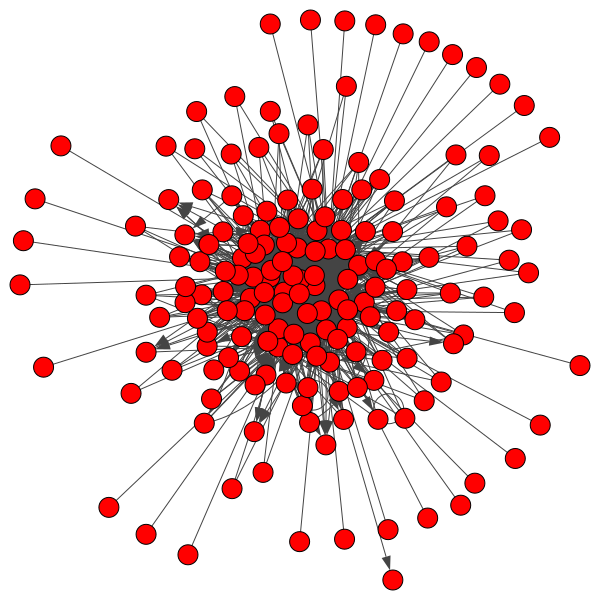

In [15]:
ig.plot(g)

In [16]:
g.diameter()

5

In [17]:
print( "Clustering Coefficient: ", g.transitivity_undirected())

Clustering Coefficient:  0.24745484400656814


In [18]:
np.mean(g.degree())

14.10344827586207

In [19]:
np.mean(g.strength(weights = 'weight'))

4979.028735632184

## Metrics

In [20]:
def get_diameter(community):
    
    diameters = []
    
    for i in range(len(community.subgraphs())):
    
        diameters.append(community.subgraphs()[i].diameter())

    return (diameters)

In [21]:
def get_transitivity(community):
    
    transitivity = []
    
    for i in range(len(community.subgraphs())):
    
        transitivity.append(community.subgraphs()[i].transitivity_undirected())

    return (transitivity)

In [22]:
def get_avg_degree(community):
    
    degree = []
    
    for i in range(len(community.subgraphs())):
    
        degree.append(np.mean(community.subgraphs()[i].degree()))

    return degree

In [23]:
def get_avg_weighted_degree(community):
    
    weighted_degree = []
    
    for i in range(len(community.subgraphs())):
    
        weighted_degree.append(np.mean(community.subgraphs()[i].strength(weights = 'weight')))

    return weighted_degree

## Community Detection

In [24]:
# Define colors used for visualization
colors = ['blue', 'yellow', 'green','purple', 'pink', 'orange', 'lightcoral', 'plum', 'darkgreen', 'darkblue', 'rosybrown',
         'crimson', 'steelblue', 'khaki', 'moccasin', 'orangered', 'fuchsia', 'thistle', 'salmon', 'chocolate', 'lightseagreen',
         'springgreen', 'darkseagreen', 'deeppink', 'mediumvioletred','olive']

### Label Propogation Community Detection

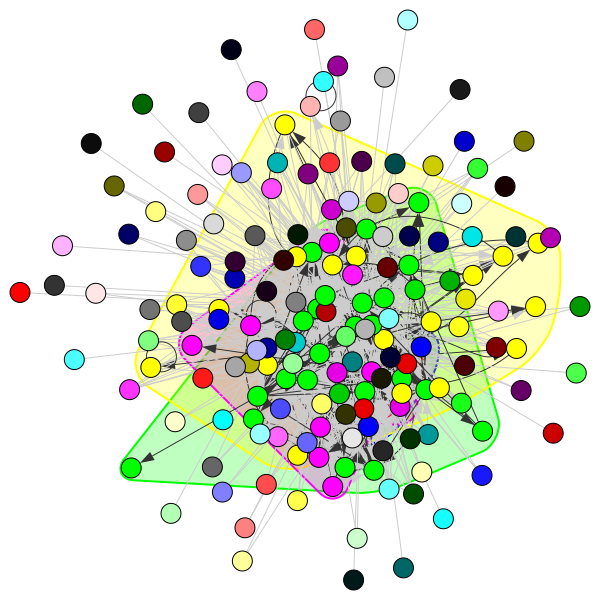

In [25]:
comm_lp= g.community_label_propagation(weights = 'weight')

ig.plot(comm_lp, mark_groups = True, layout="drl")

In [26]:
modularity = g.modularity(comm_lp, weights='weight')
print(modularity)

0.015013011222583014


In [27]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_lp))
print('average degree: ', get_avg_degree(comm_lp))
print('transitivity: ', get_transitivity(comm_lp))
print('diameter: ', get_diameter(comm_lp))

average weighted degree:  [0.0, 19788.82608695652, 30.0, 436.2352941176471, 166.85714285714286, 0.0, 0.0, 18.0, 0.0, 0.0, 0.0, 230.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [0.0, 15.217391304347826, 1.0, 5.176470588235294, 4.571428571428571, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Leading Eigenvector Community Detection

/Users/susankoruthu/opt/anaconda3/lib/python3.8/site-packages/igraph/__init__.py:1281: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  membership, _, q = GraphBase.community_leading_eigenvector(


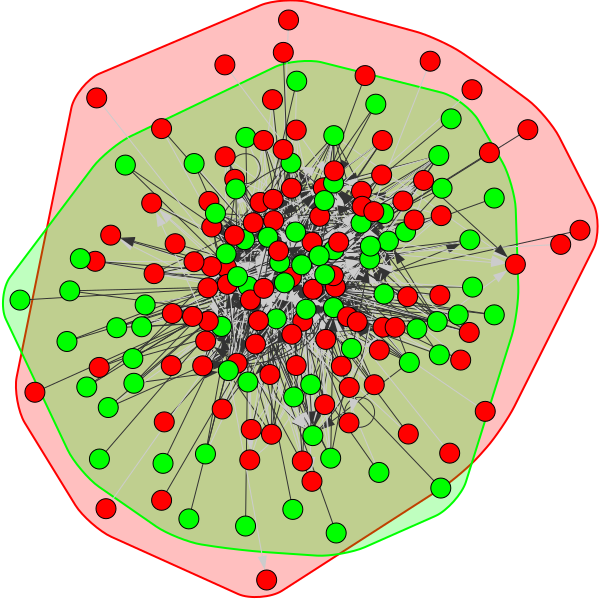

In [28]:
comm_leading_eigenvector= g.community_leading_eigenvector(weights = 'weight')

ig.plot(comm_leading_eigenvector, mark_groups = True, layout="drl")

In [29]:
modularity = g.modularity(comm_leading_eigenvector, weights='weight')
print(modularity)

0.1392852852192658


In [30]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_leading_eigenvector))
print('average degree: ', get_avg_degree(comm_leading_eigenvector))
print('transitivity: ', get_transitivity(comm_leading_eigenvector))
print('diameter: ', get_diameter(comm_leading_eigenvector))

average weighted degree:  [1810.1782178217823, 5338.041095890411]
average degree:  [5.326732673267327, 9.643835616438356]
transitivity:  [0.1493288590604027, 0.3371588523442967]
diameter:  [3, 4]


In [31]:
df_leading_eigenvector = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leading_eigenvector.membership } )
df_leading_eigenvector

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
169               Venezuela          0
170                 Vietnam          1
171                   Yemen          0
172                  Zambia          1
173                Zimbabwe          0

[174 rows x 2 columns]

In [32]:
df_leading_eigenvector.describe()

community
count  174.000000
mean     0.419540
std      0.494908
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000

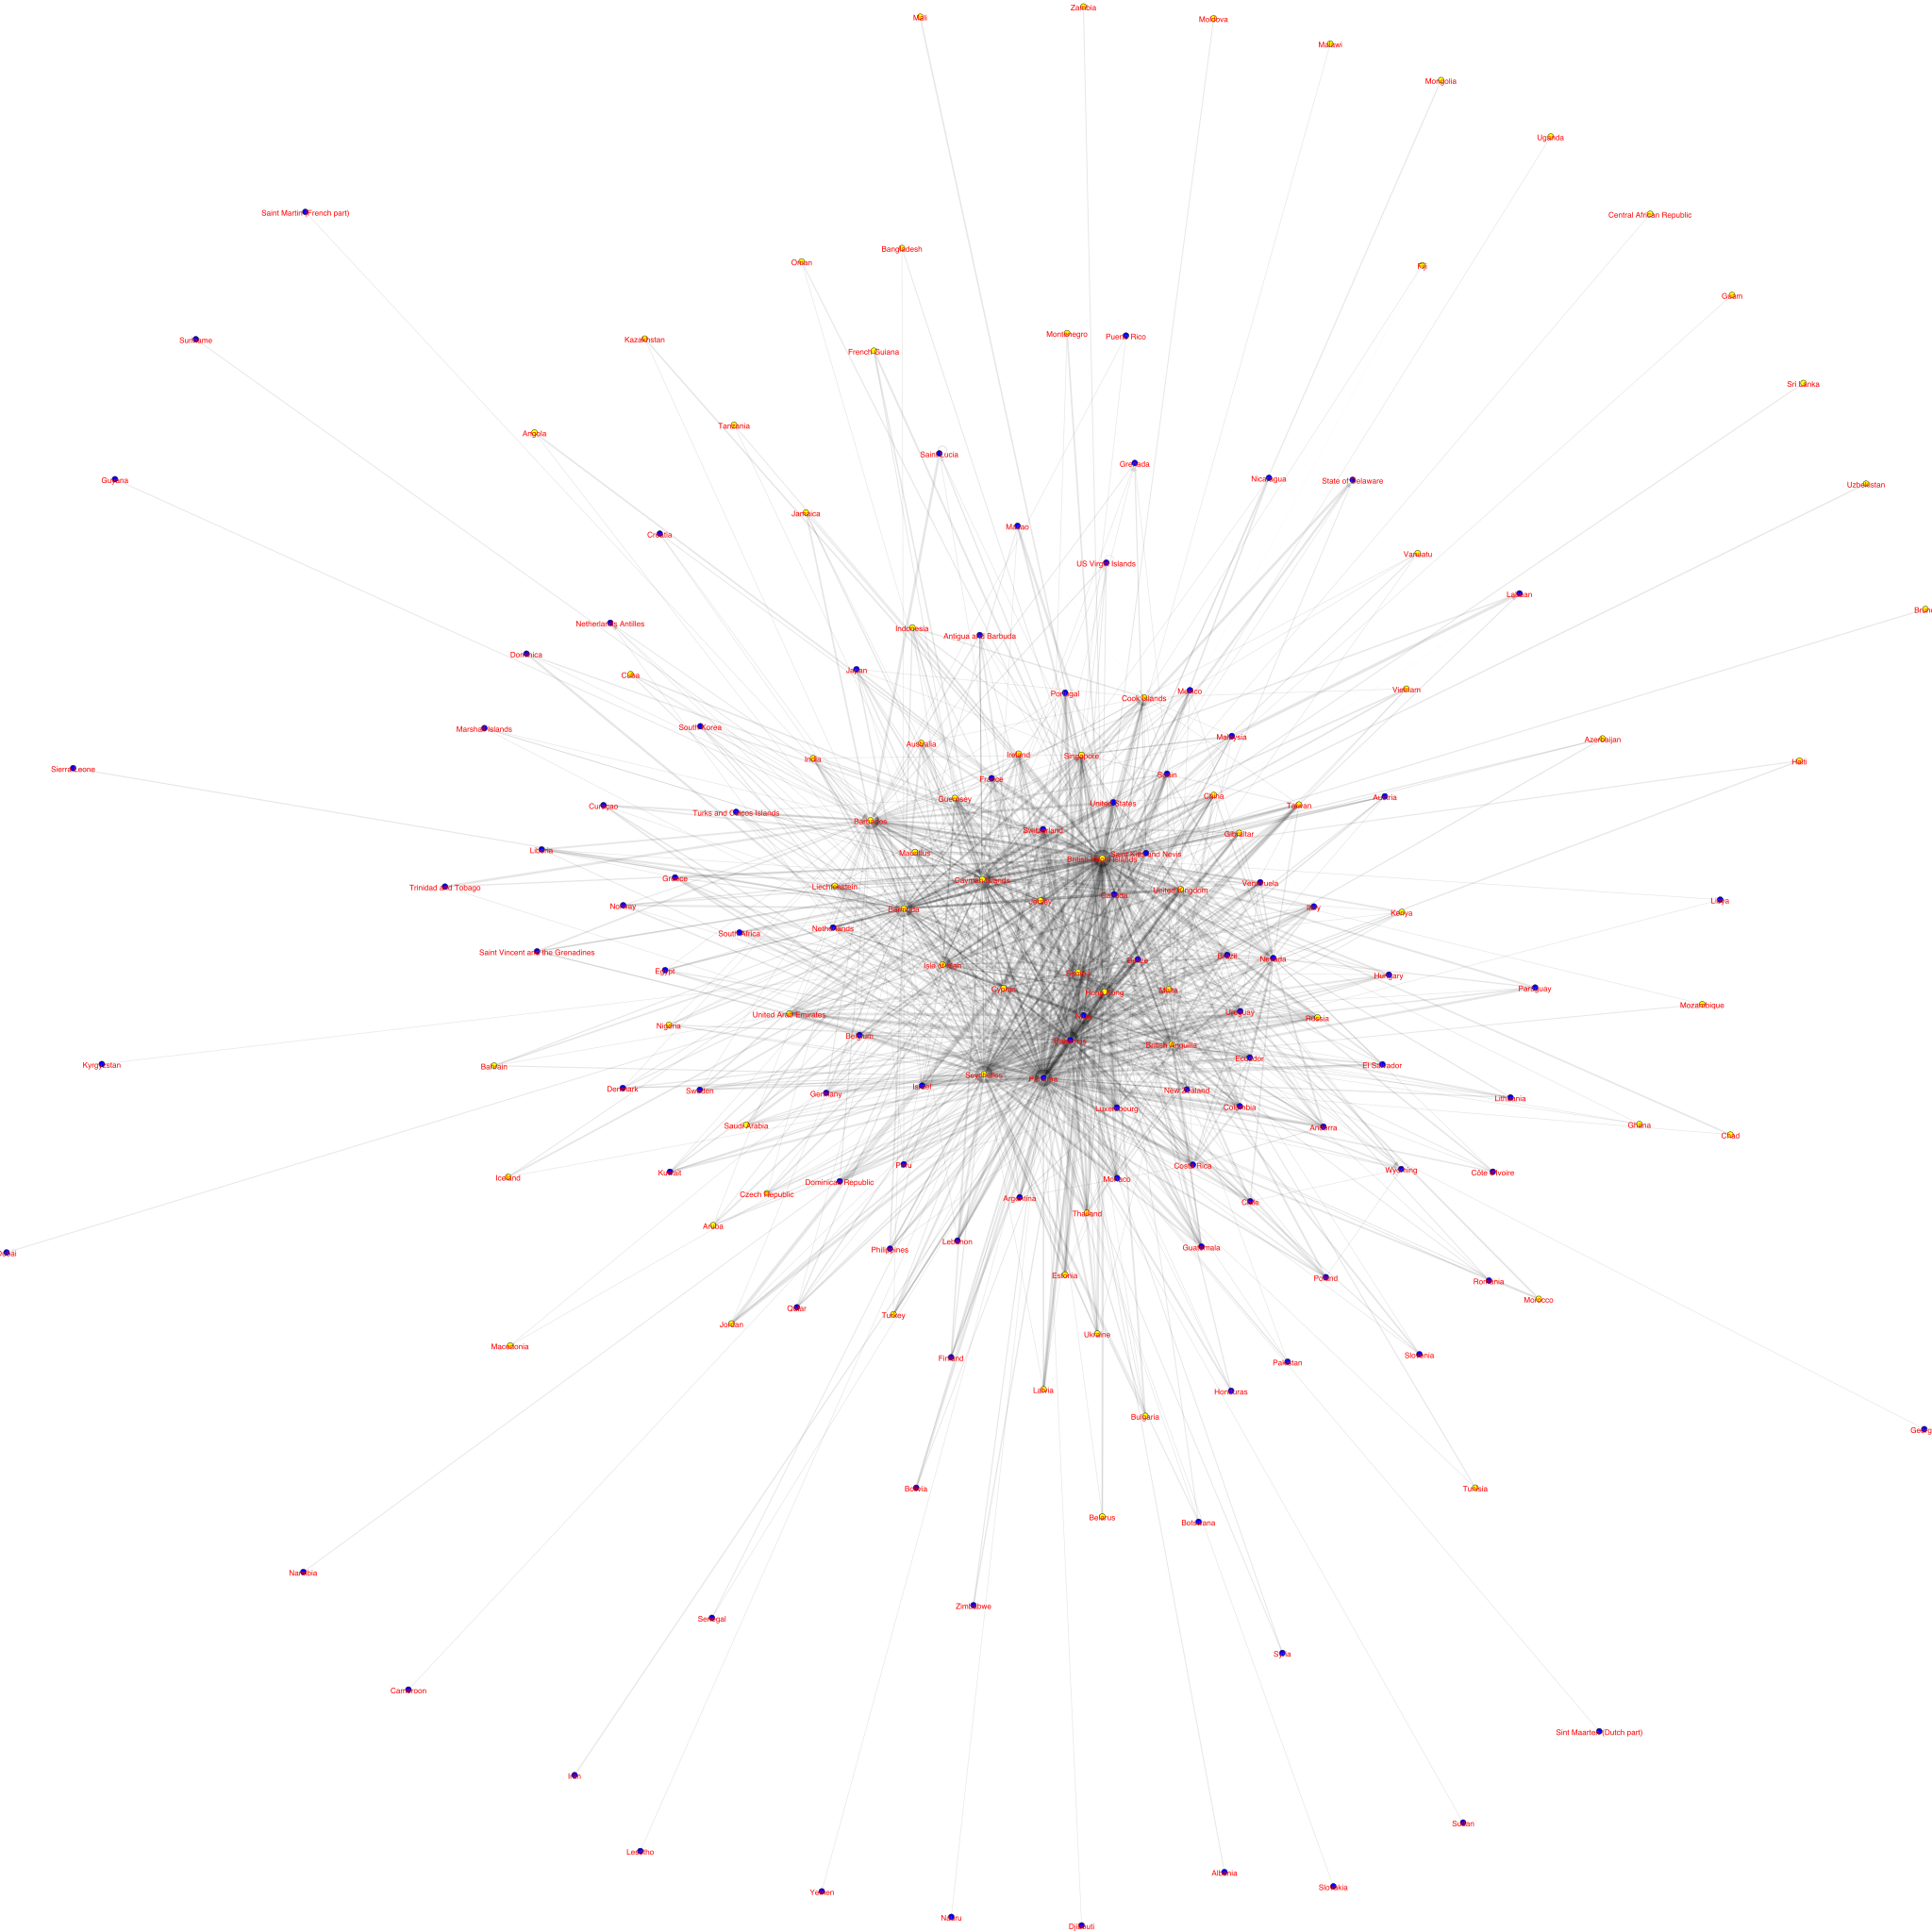

In [33]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_leading_eigenvector.membership)):
    vertex_colors.append(colors[comm_leading_eigenvector.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_all_jur_images/communities_leading_eigenvector.png', vertex_label = g.vs['name'] , **visual_style)

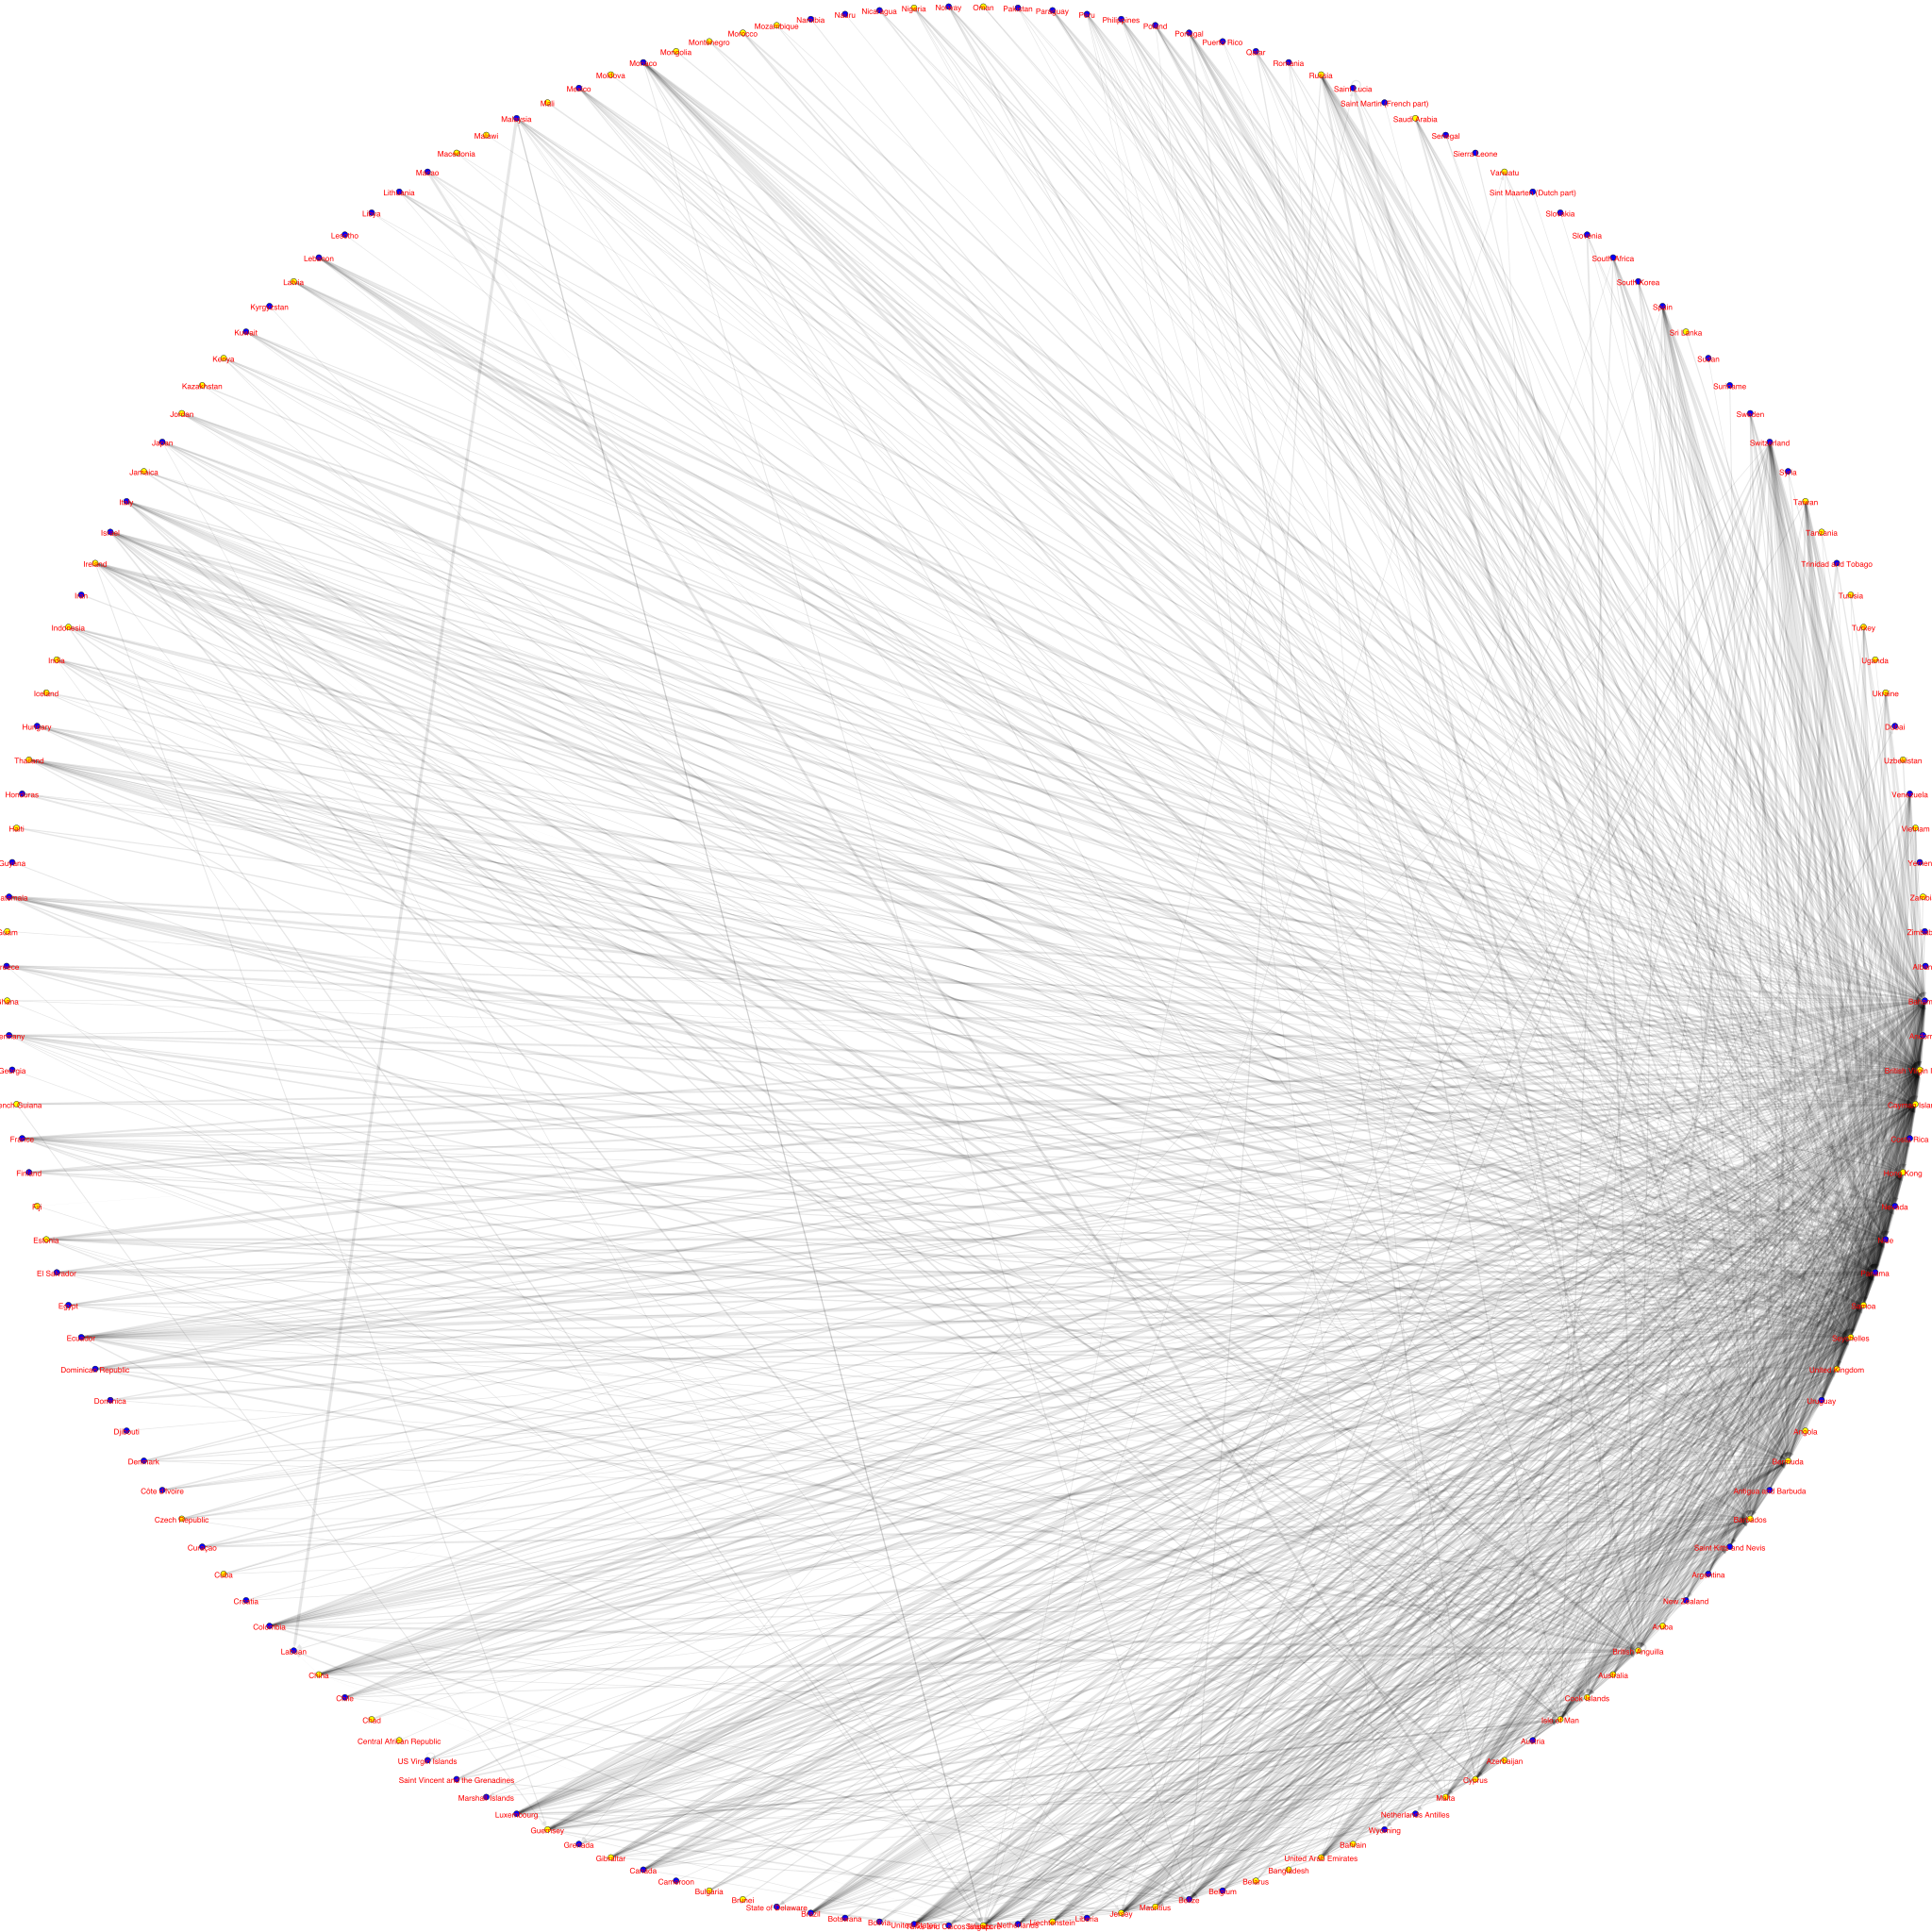

In [34]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_all_jur_images/leading_vector_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [35]:
for i in range(len(comm_leading_eigenvector.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_leading_eigenvector.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_leading_eigenvector.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_leading_eigenvector.subgraphs()[i],'directed_all_jur_images/leading_eigenvector_subgraph' + str(i) + '.png' ,vertex_label = comm_leading_eigenvector.subgraphs()[i].vs['name'],**visual_style  )
    

### Spinglass Community Detection

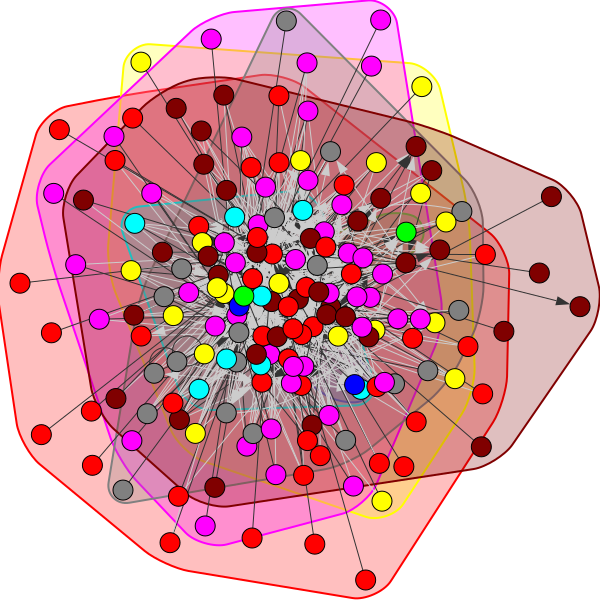

In [36]:
comm_spinglass = g.community_spinglass(weights = 'weight')

ig.plot(comm_spinglass, mark_groups = True, layout="drl")

In [37]:
modularity = g.modularity(comm_spinglass, weights='weight')
print(modularity)

0.10775915645113118


In [38]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_spinglass))
print('average degree: ', get_avg_degree(comm_spinglass))
print('transitivity: ', get_transitivity(comm_spinglass))
print('diameter: ', get_diameter(comm_spinglass))

average weighted degree:  [5125.288888888889, 844.0, 230.0, 537.0526315789474, 1392.8372093023256, 199.0, 153.1578947368421, 1681.5555555555557]
average degree:  [3.2, 1.0, 1.0, 2.4210526315789473, 3.0232558139534884, 1.75, 2.1052631578947367, 5.055555555555555]
transitivity:  [0.10109289617486339, nan, nan, 0.07947019867549669, 0.08171206225680934, 0.0, 0.0, 0.322463768115942]
diameter:  [6, 1, 1, 3, 2, 1, 1, 4]


In [39]:
df_spinglass = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_spinglass.membership } )
df_spinglass

name  community
0                   Albania          3
1                   Bahamas          3
2                   Andorra          4
3    British Virgin Islands          0
4            Cayman Islands          7
..                      ...        ...
169               Venezuela          4
170                 Vietnam          7
171                   Yemen          4
172                  Zambia          0
173                Zimbabwe          4

[174 rows x 2 columns]

In [40]:
df_spinglass.describe()

community
count  174.000000
mean     3.683908
std      2.584542
min      0.000000
25%      0.000000
50%      4.000000
75%      6.000000
max      7.000000

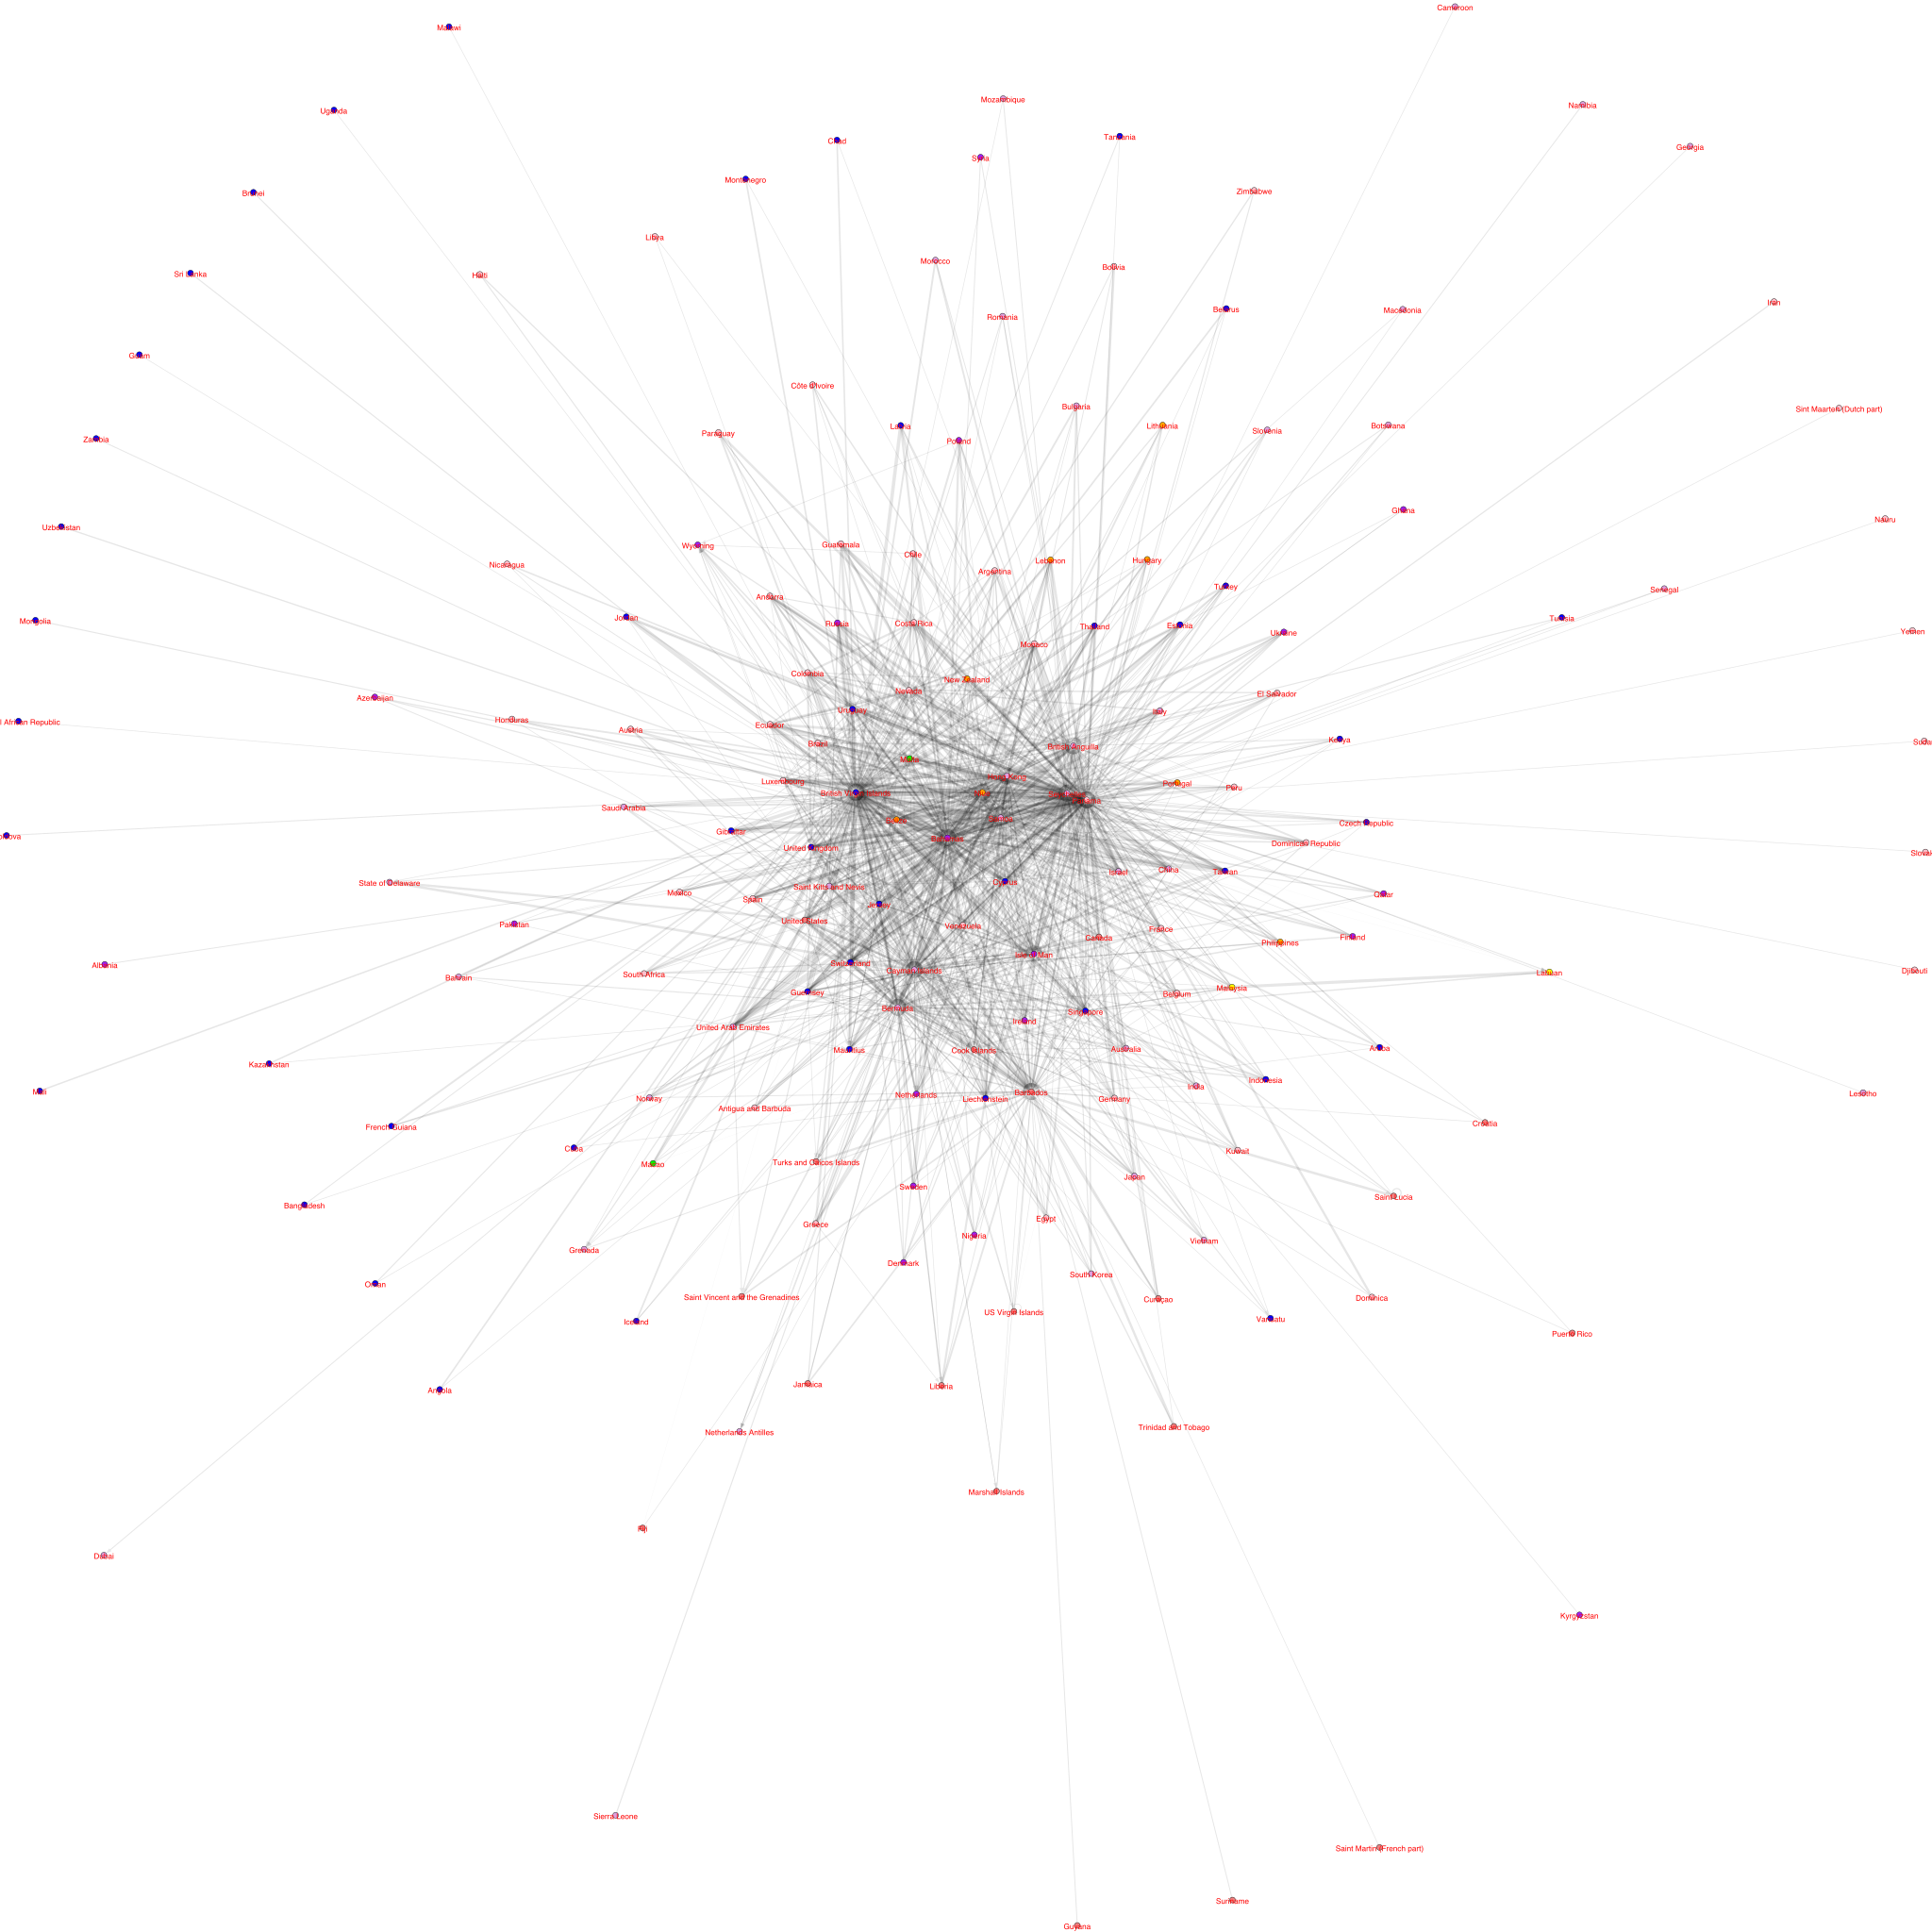

In [41]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_spinglass.membership)):
    vertex_colors.append(colors[comm_spinglass.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_all_jur_images/communities_spinglass.png', vertex_label = g.vs['name'] , **visual_style)

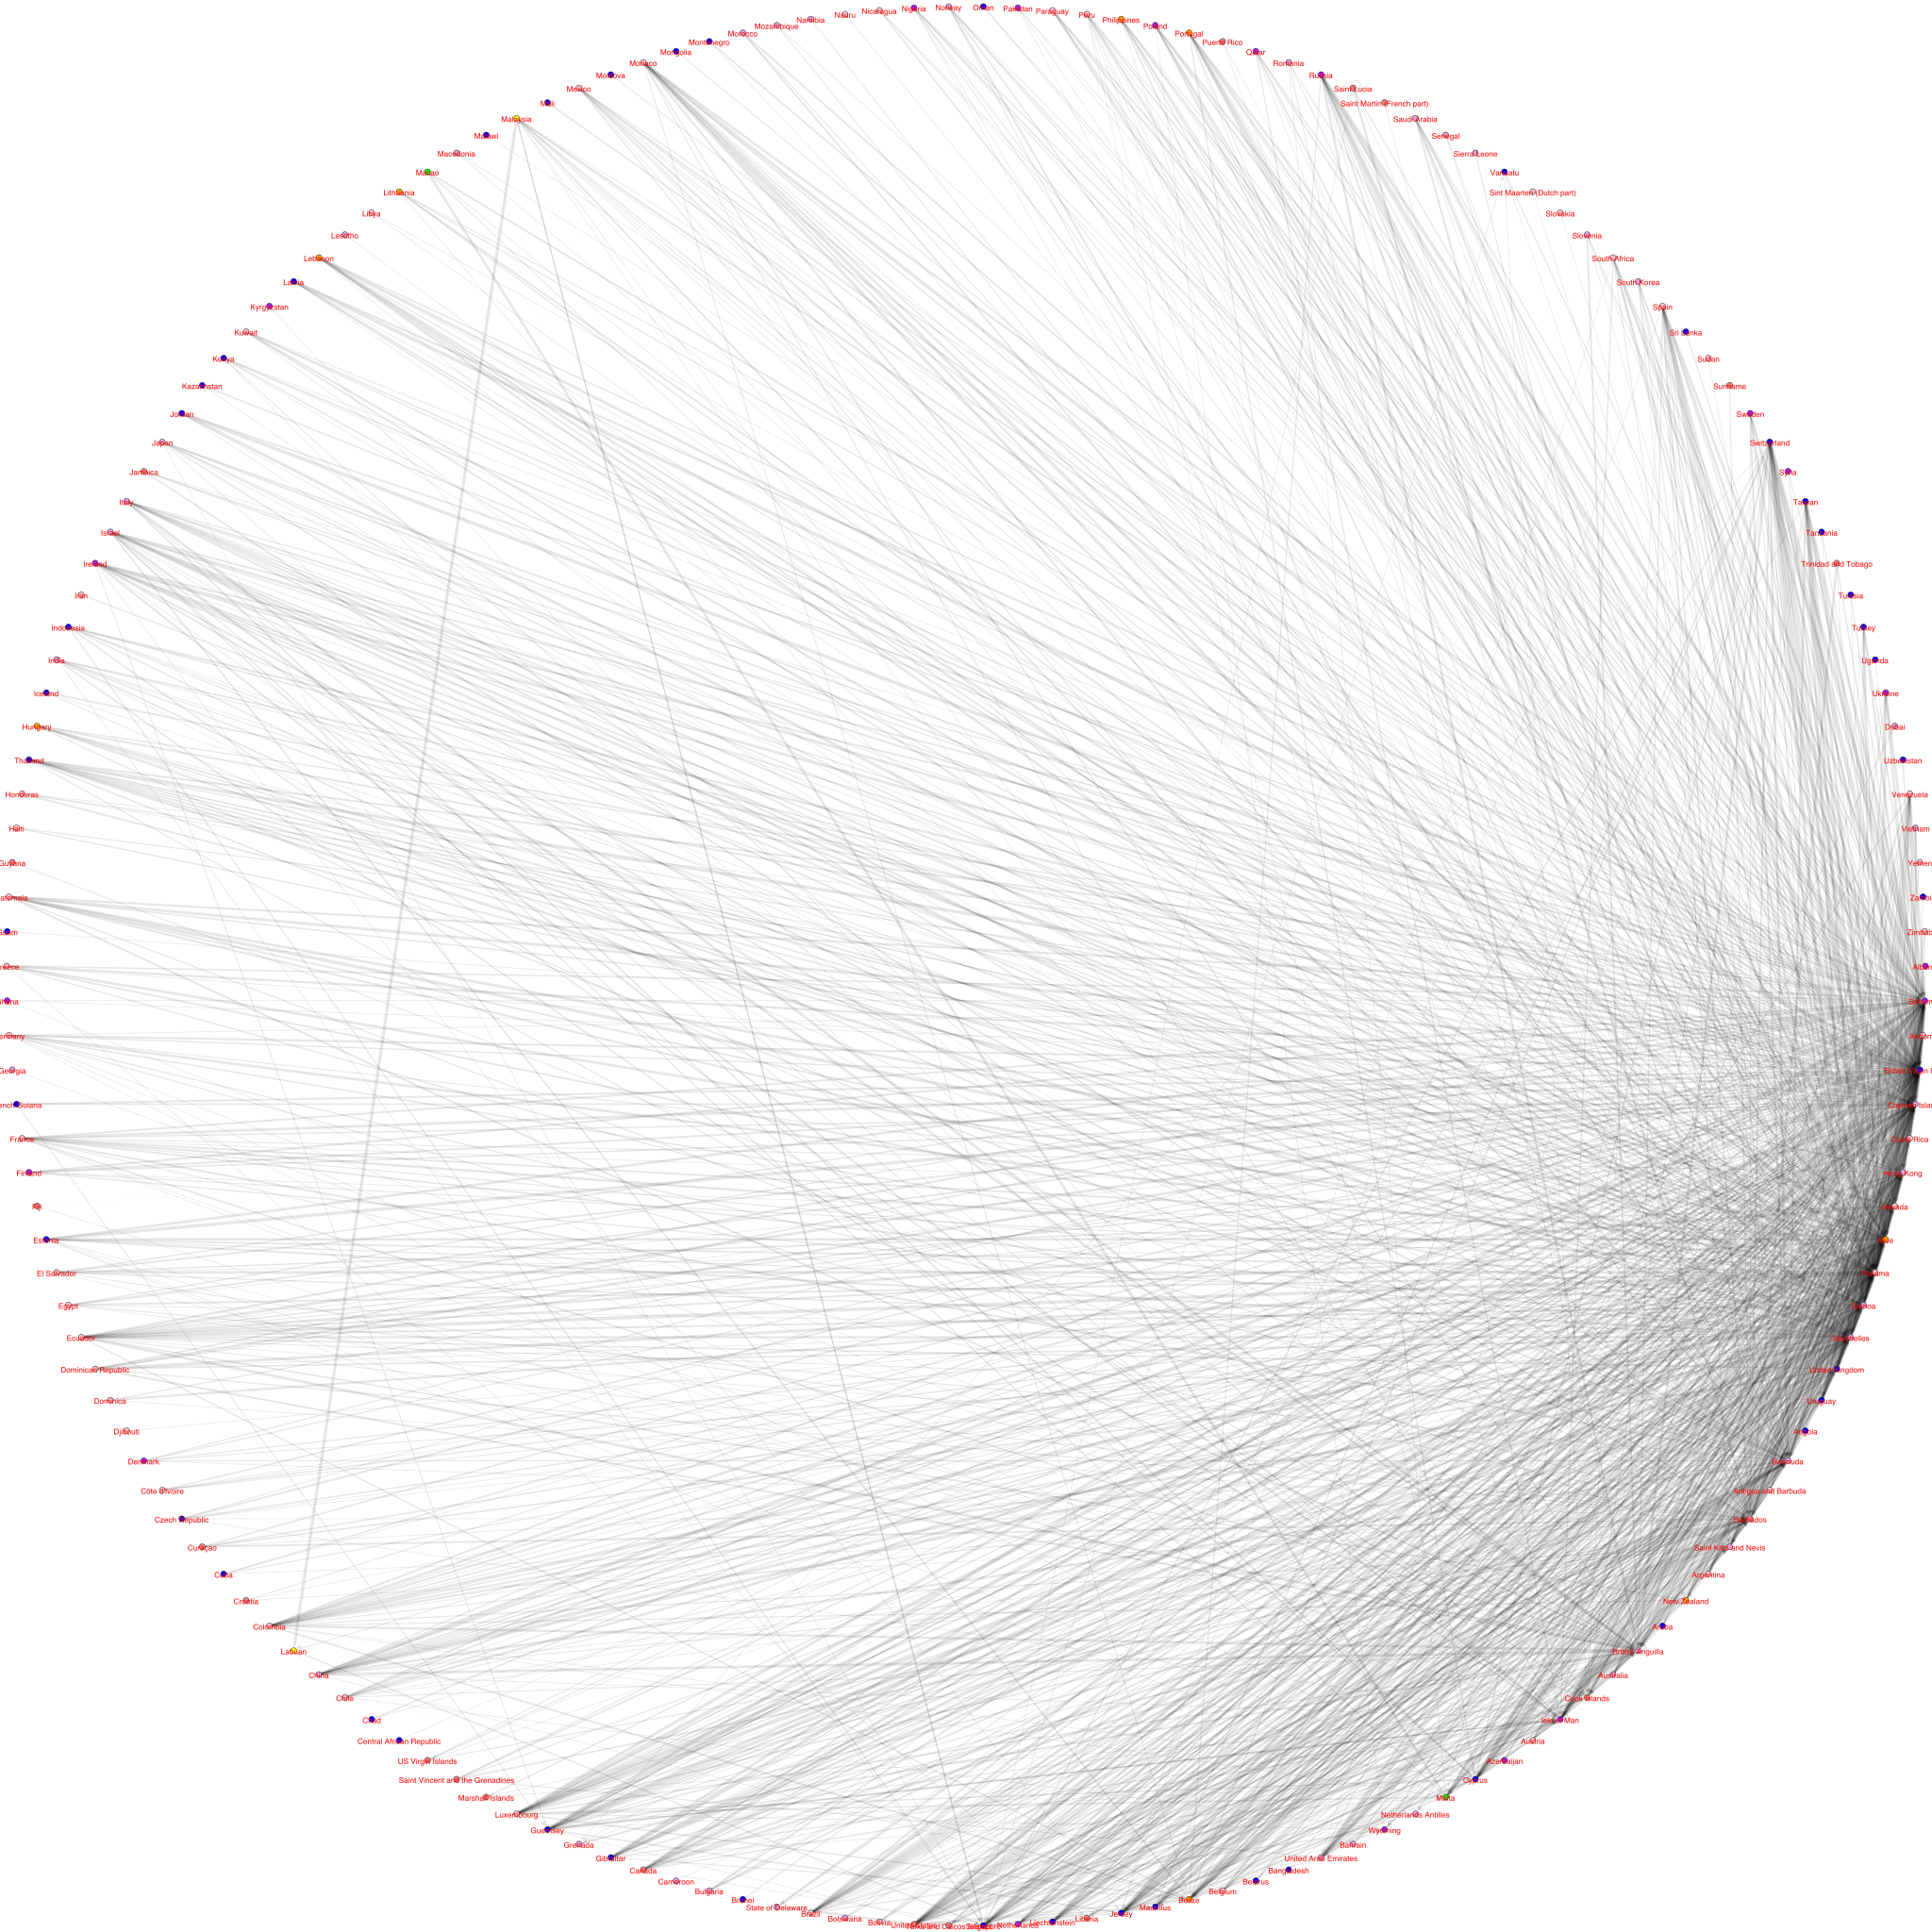

In [42]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_all_jur_images/spinglass_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [43]:
for i in range(len(comm_spinglass.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_spinglass.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_spinglass.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_spinglass.subgraphs()[i],'directed_all_jur_images/spinglass_subgraph' + str(i) + '.png' ,vertex_label = comm_spinglass.subgraphs()[i].vs['name'],**visual_style  )
    

### Walktrap Community Detection

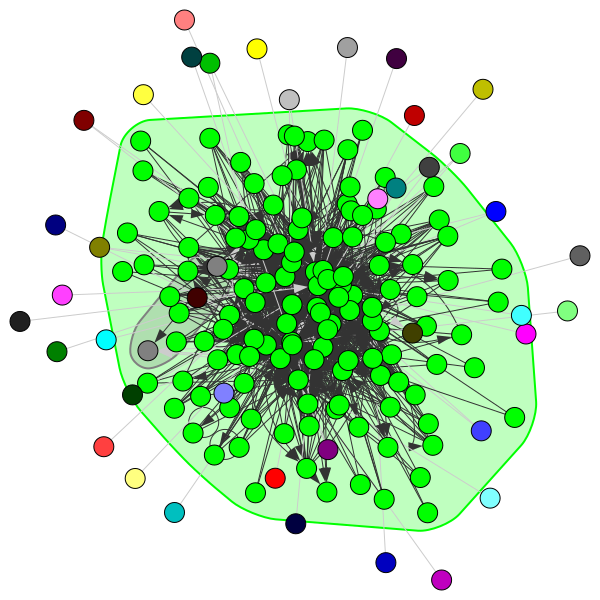

In [44]:
walktrap = g.community_walktrap(weights = 'weight', steps = 2)

comm_walktrap = walktrap.as_clustering()

ig.plot(comm_walktrap, mark_groups = True, layout="drl")

In [45]:
modularity = g.modularity(comm_walktrap, weights='weight')
print(modularity)

0.003886750362990465


In [46]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_walktrap))
print('average degree: ', get_avg_degree(comm_walktrap))
print('transitivity: ', get_transitivity(comm_walktrap))
print('diameter: ', get_diameter(comm_walktrap))

average weighted degree:  [0.0, 6545.106060606061, 0.0, 0.0, 0.0, 0.0, 844.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [0.0, 17.545454545454547, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
transitivity:  [nan, 0.27739790086251687, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
diameter:  [0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [47]:
df_walktrap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_walktrap.membership } )
df_walktrap

name  community
0                   Albania          0
1                   Bahamas          1
2                   Andorra          1
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
169               Venezuela          1
170                 Vietnam          1
171                   Yemen         40
172                  Zambia         41
173                Zimbabwe          1

[174 rows x 2 columns]

In [48]:
df_walktrap.describe()

community
count  174.000000
mean     5.735632
std     10.274791
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max     41.000000

In [49]:
# ##plot community
# visual_style = {}

# vertex_colors = []

# for i in range(len(comm_walktrap.membership)):
#     vertex_colors.append(colors[comm_walktrap.membership[i]])
    
# # Set bbox and margin
# visual_style["bbox"] = (5000,5000)
# visual_style["margin"] = 17

# # Set vertex colours
# visual_style["vertex_color"] = vertex_colors

# # Set edge width
# visual_style["edge_width"] = np.log(g.es['weight']) + 1

# # Set edge color
# visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# # Set vertex size
# visual_style["vertex_size"] = 15

# # Set vertex label size
# visual_style["vertex_label_size"] = 20

# # Set vertex label color
# visual_style["vertex_label_color"] = 'red'

# # Don't curve the edges
# visual_style["edge_curved"] = False

# # Set the layout
# my_layout = g.layout_fruchterman_reingold()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'directed_all_jur_images/communities_walktrap.png', vertex_label = g.vs['name'] , **visual_style)

In [50]:
# # Set the layout
# my_layout = g.layout_circle()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'directed_all_jur_images/walktrap_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [51]:
# for i in range(len(comm_walktrap.subgraphs())):
    
#     visual_style["bbox"] = (2000,2000)
#     visual_style["margin"] = 17
    
#     # Set vertex colours
#     visual_style["vertex_color"] = 'green'

#     # Set edge width
#     visual_style["edge_width"] = np.log(comm_walktrap.subgraphs()[i].es['weight']) + 1
#     # Set the layout
#     my_layout = comm_walktrap.subgraphs()[i].layout_fruchterman_reingold()
#     visual_style["layout"] = my_layout

#     ig.plot(comm_walktrap.subgraphs()[i],'directed_all_jur_images/walktrap_subgraph' + str(i) + '.png' ,vertex_label = comm_walktrap.subgraphs()[i].vs['name'],**visual_style  )
    

### Infomap Community Detection

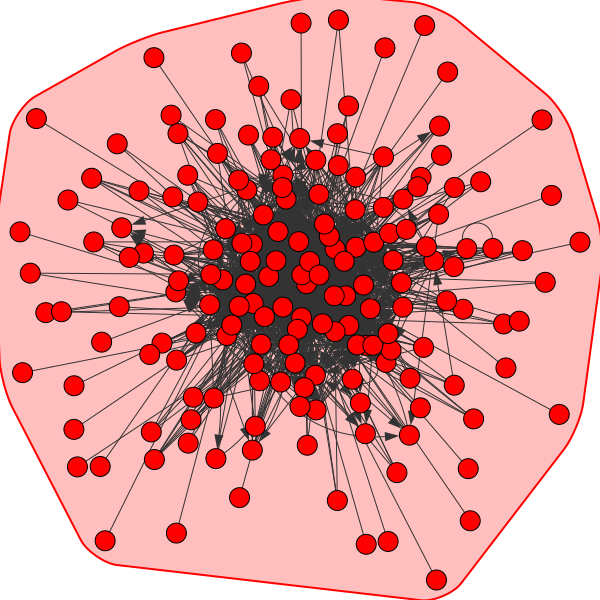

In [52]:
comm_infomap = g.community_infomap(edge_weights = 'weight')

ig.plot(comm_infomap, mark_groups = True, layout="drl")

In [53]:
modularity = g.modularity(comm_infomap, weights='weight')
print(modularity)

0.0


In [54]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_infomap))
print('average degree: ', get_avg_degree(comm_infomap))
print('transitivity: ', get_transitivity(comm_infomap))
print('diameter: ', get_diameter(comm_infomap))

average weighted degree:  [4979.028735632184]
average degree:  [14.10344827586207]
transitivity:  [0.24745484400656814]
diameter:  [5]


In [55]:
df_infomap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_infomap.membership } )
df_infomap

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          0
4            Cayman Islands          0
..                      ...        ...
169               Venezuela          0
170                 Vietnam          0
171                   Yemen          0
172                  Zambia          0
173                Zimbabwe          0

[174 rows x 2 columns]

In [56]:
## no visualisation since no community is detected